# Graphs depicting rate of blacklisting for liars given fixed lies

This file allows us to measure how many liars are blacklisted, depending on the choice of liars for a fixed set of lies.

There are multiple configurable variables (see below)

The generated data can be created by the graph_var_liars_test.go file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
lowerBoundLies = 1000  #lower bound on difference between true latency and lie told about it
upperBoundLies = 50000 #upper bound on difference between true latency and lie told about it
nbNodes = 100
nbLiars = 33
nbLiarCombinations = 100 #nb different combinations of liars chosen throughout test
randomLiars = False      #whether the liars are chosen randomly or within cluster
withSuspects = True      #activate enhanced blacklisting

random = "random_liars"
if not randomLiars:
    random = "clustered_liars"

filename = "test_" + \
    str(nbNodes) + "_nodes_" +\
    str(nbLiars) + "_liars" +\
    "_var_liars_distance_" + str(upperBoundLies) +\
    "_" + random +\
    "_" + str(nbLiarCombinations) + "_combinations"

if withSuspects:
    filename += "_with_suspects"

In [3]:
data= pd.read_csv("data/" + filename + ".csv")

In [4]:
data

,node,is_liar,is_blacklisted,lie,cluster
0,N0,False,False,0,0
1,N1,False,False,0,0
2,N2,True,True,41607,0
3,N2,True,True,14191,0
4,N2,True,True,44109,0
5,N2,True,True,47076,0
6,N2,True,True,37688,0
7,N2,True,True,9730,0
8,N2,True,True,10522,0
9,N2,True,True,7188,0


In [5]:
data["grouped"] = list(zip(data.is_liar, data.is_blacklisted))
grouped_data = data[["node", "grouped"]]

In [6]:
grouped_by_node = grouped_data.groupby("node").agg(lambda x: set(x.values.tolist()))

In [7]:
grouped_by_node["nb_situations"] = grouped_by_node['grouped'].map(lambda x: len(x))

In [8]:
grouped_by_node.sort_values(by="nb_situations", ascending=False)

,grouped,nb_situations
node,,
N0,"{(True, False), (False, False), (True, True)}",3
N63,"{(True, False), (False, False), (True, True)}",3
N73,"{(True, False), (False, False), (True, True)}",3
N72,"{(True, False), (False, False), (True, True)}",3
N71,"{(True, False), (False, False), (True, True)}",3
N7,"{(True, False), (False, False), (True, True)}",3
N69,"{(True, False), (False, False), (True, True)}",3
N68,"{(True, False), (False, False), (True, True)}",3
N67,"{(True, False), (False, False), (True, True)}",3


In [9]:
data[["node", "is_liar", "is_blacklisted"]].groupby(["is_liar", "is_blacklisted"]).count()

node
is_liar is_blacklisted        
False   False             6700
True    False            81514
        True            192386

In [10]:
lie_effects = data[["lie", "is_blacklisted"]][data["lie"] > 0]

In [11]:
lie_effects.groupby("lie").count().reset_index()

,lie,is_blacklisted
0,1017,100
1,1057,100
2,1075,100
3,1096,100
4,1107,100
5,1123,100
6,1138,100
7,1149,100
8,1151,100
9,1162,100


In [12]:
lie_effects.groupby("lie").agg(lambda x: set(x.values.tolist())).reset_index().sort_values(by="lie")

,lie,is_blacklisted
0,1017,"{False, True}"
1,1057,{True}
2,1075,{True}
3,1096,{True}
4,1107,"{False, True}"
5,1123,{True}
6,1138,"{False, True}"
7,1149,"{False, True}"
8,1151,"{False, True}"
9,1162,{True}


In [13]:
bl_by_lie = lie_effects.groupby(['lie', 'is_blacklisted']).size().unstack(fill_value=0).reset_index().sort_values(by="lie")

In [14]:
bl_by_lie

is_blacklisted,lie,False,True
0,1017,62,38
1,1057,0,100
2,1075,0,100
3,1096,0,100
4,1107,37,63
5,1123,0,100
6,1138,4,96
7,1149,11,89
8,1151,14,86
9,1162,0,100


In [15]:
bl_by_lie['lie_buckets'] = pd.qcut(bl_by_lie['lie'], 10)

In [16]:
bl_by_lie[["lie_buckets", True, False]].groupby("lie_buckets").sum().reset_index()

is_blacklisted,lie_buckets,True,False
0,"(1016.999, 5985.0]",20651,6949
1,"(5985.0, 10565.0]",19929,7071
2,"(10565.0, 15481.0]",19666,7734
3,"(15481.0, 20353.0]",18657,8443
4,"(20353.0, 25325.0]",18977,8423
5,"(25325.0, 30223.0]",18425,9075
6,"(30223.0, 35019.0]",18892,8708
7,"(35019.0, 39816.4]",18827,8773
8,"(39816.4, 44814.8]",18851,8349
9,"(44814.8, 49914.0]",19511,7989


Text(0.5, 0, 'Lie range')

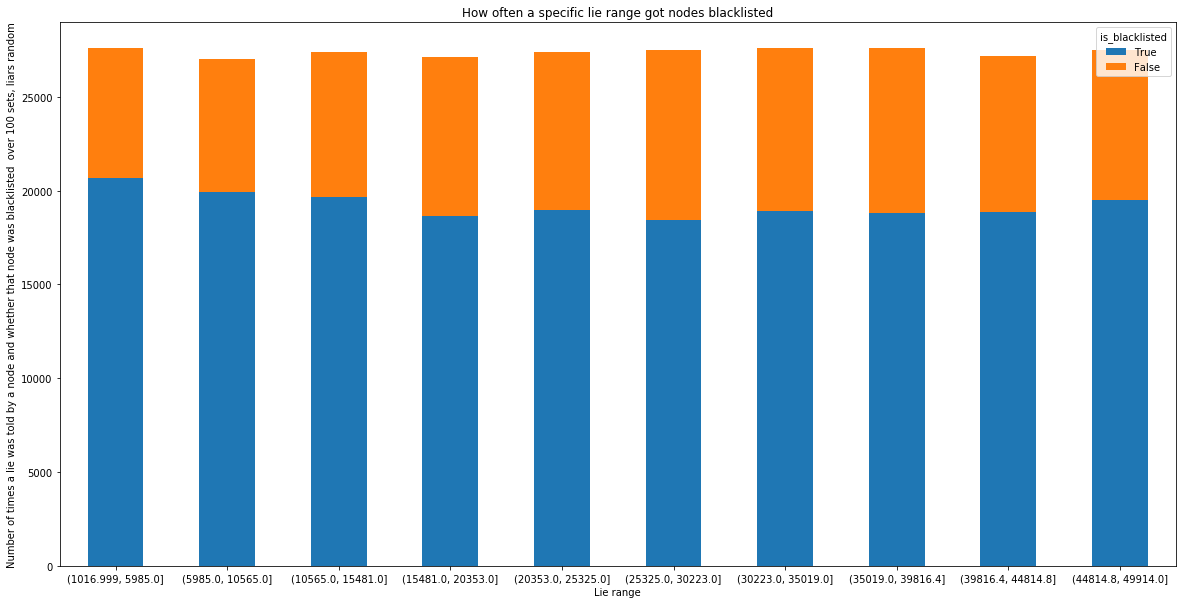

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
bl_by_lie[["lie_buckets", True, False]]\
    .groupby("lie_buckets").sum().reset_index()\
    .plot.bar(stacked=True, ax=ax, rot=0, 
              x="lie_buckets", title="How often a specific lie range got nodes blacklisted")

ax.set_ylabel("Number of times a lie was told by a node and whether that node was blacklisted  over 100 sets, liars random")
ax.set_xlabel("Lie range")

In [18]:
fig.savefig('graphs/range/'+ filename +".png")

In [19]:
bl_by_lie["Percentage"] = (bl_by_lie[True]/(bl_by_lie[True] + bl_by_lie[False])).replace([np.inf, -np.inf], 0.0)

In [20]:
bl_by_lie

is_blacklisted,lie,False,True,lie_buckets,Percentage
0,1017,62,38,"(1016.999, 5985.0]",0.38
1,1057,0,100,"(1016.999, 5985.0]",1.00
2,1075,0,100,"(1016.999, 5985.0]",1.00
3,1096,0,100,"(1016.999, 5985.0]",1.00
4,1107,37,63,"(1016.999, 5985.0]",0.63
5,1123,0,100,"(1016.999, 5985.0]",1.00
6,1138,4,96,"(1016.999, 5985.0]",0.96
7,1149,11,89,"(1016.999, 5985.0]",0.89
8,1151,14,86,"(1016.999, 5985.0]",0.86
9,1162,0,100,"(1016.999, 5985.0]",1.00


Text(0.5, 0, 'Lie ranges')

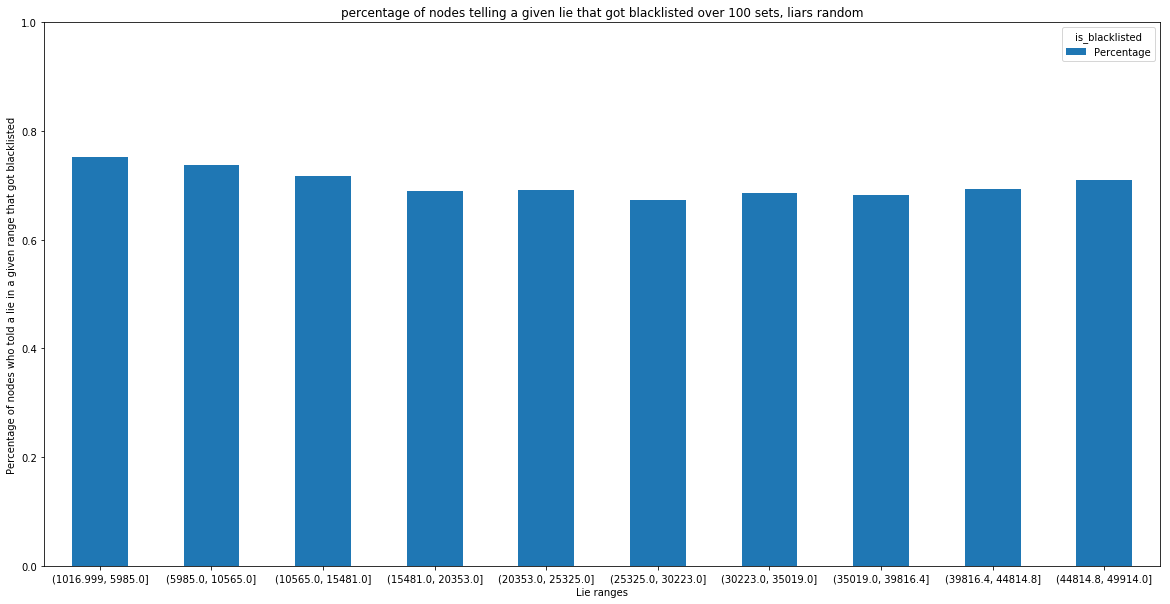

In [21]:
fig1, ax1 = plt.subplots(figsize=(20, 10))
bl_by_lie[["Percentage", "lie_buckets"]]\
    .groupby("lie_buckets").mean().reset_index()\
    .plot(kind="bar",x="lie_buckets", ax=ax1, yticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0],  rot=0,
          title="percentage of nodes telling a given lie that got blacklisted over 100 sets, liars random")

ax1.set_ylabel("Percentage of nodes who told a lie in a given range that got blacklisted")
ax1.set_xlabel("Lie ranges")

In [22]:
fig1.savefig('graphs/percentage/'+filename+'_percentage.png')